#### Linear regression 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import *

#### Data generation
First we need to create our x data and y data. We want to find out the paramets a and b for the fuction $y = a*x + b $ Our parameters a and b are known, $a = 1.65$ and $b = 3.8$. In addition we add some random noise with mean 0 and standard deviation 8 to the target y.

In [2]:
N = 50
x_data = (np.linspace(0,50,N)).astype('float32')
y_data = (1.65 * x_data + 3.8 + np.random.normal(0,8,N)).astype('float32')

This is the function with and without noise

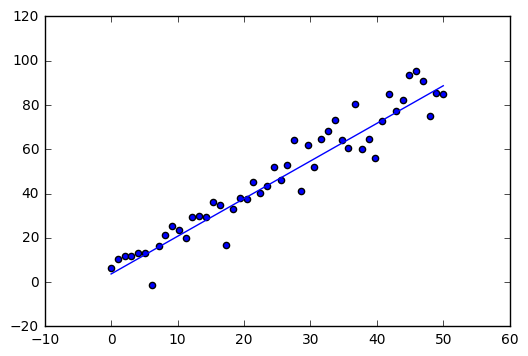

In [3]:
plt.scatter(x_data,y_data)
plt.plot(x_data,1.7*x_data+3.7)

#### RSS Minimization by trying
Fit a linear function to the data and calculate residual sum of squares (RSS). Play around with the sliders so that the RSS is minimized.

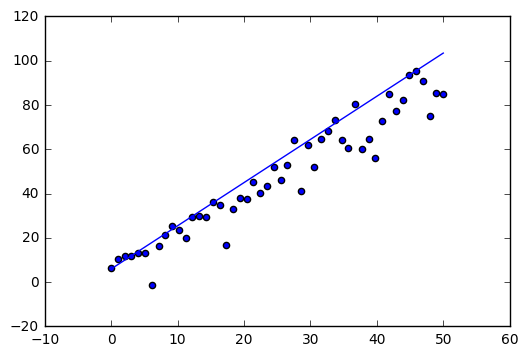

RSS is 5513.39531299


<function __main__.linreg>

In [4]:
def linreg(a,b):
    plt.scatter(x_data,y_data)
    plt.plot(x_data,a*x_data+b)
    plt.show()
    print("RSS is {}".format(sum(np.square(y_data-(a*x_data+b)))))

interact(linreg,a=(0,5,0.05),b=(2,10,0.05))

#### Linear regression in TensorFlow, feeding data  

In [5]:
# Defining the graph (construction phase)
a = tf.Variable(1.0, name = 'a') 
b = tf.Variable(0.01, name = 'b')
x = tf.placeholder('float32', [N], name='x_data')
y = tf.placeholder('float32', [N], name='y_data')
loss = tf.reduce_sum(tf.square(a*x + b - y),) #Sum is called reduce_sum 

init_op = tf.initialize_all_variables() #Initialization ('symbolic'), this creates a new operation in the graph. Which
# initializes the graph. We call this later, when we have a concrete realization of the graph

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Now feed your optimal parameters from above through the tensorflow graph and compare the "loss" with the RSS 

In [6]:
# Working with a concrete realization (launching a graph). 
# A session sess is created  with the with construct 
# the session is closed, when moving out of the with class
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    res = sess.run(loss, feed_dict={x:x_data, y:y_data, a:1.85, b:2}) #Evaluation loss using the provided data
    writer = tf.summary.FileWriter("/tmp/linreg", sess.graph, 'dumm.pbtxt') 
    writer.close()
    print("Loss {}".format(res))
    sess.close()


Loss 2757.26464844


In [ ]:
!tensorboard --logdir=/tmp/linreg/


Starting TensorBoard 39 on port 6006
(You can navigate to http://172.17.0.2:6006)
